# OmniSci [Vega Tutorial](https://www.omnisci.com/docs/latest/6_vegaTutorials.html)

Let's go through the OmniSci vega tutorial, but try to replicate as much as possible with Altair / Vega Lite.

In [6]:
import altair as alt
import ibis
import jupyterlab_omnisci

In [7]:
alt.data_transformers.enable('ibis')
alt.themes.enable('none')

conn = ibis.mapd.connect(
    host='metis.mapd.com', user='mapd', password='HyperInteractive',
    port=443, database='mapd', protocol= 'https'
)

## Getting Started with Vega

In [8]:
t = conn.table('tweets_nov_feb')

SELECT "goog_x", "goog_y"
FROM tweets_nov_feb

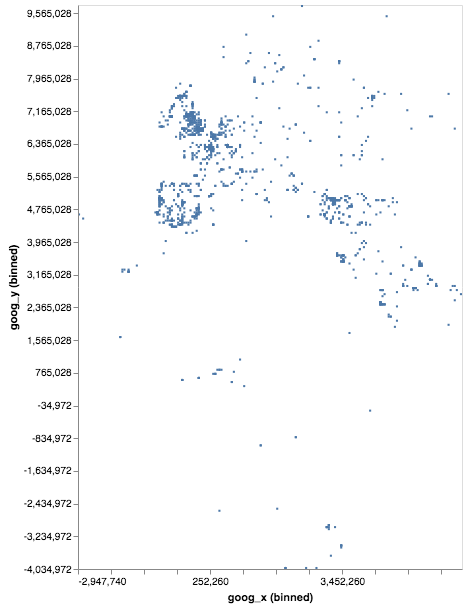

SELECT "goog_x", "goog_y"
FROM tweets_nov_feb
WHERE ("goog_x" >= -3650484.1235206556) AND
      ("goog_x" <= 7413325.514451755) AND
      ("goog_y" >= -5778161.9183506705) AND
      ("goog_y" <= 10471808.487466192)

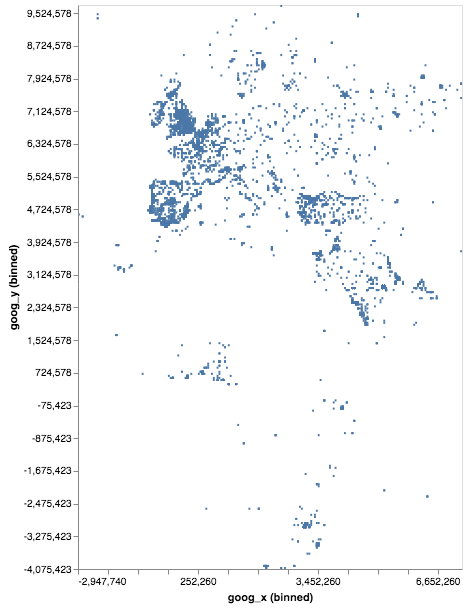

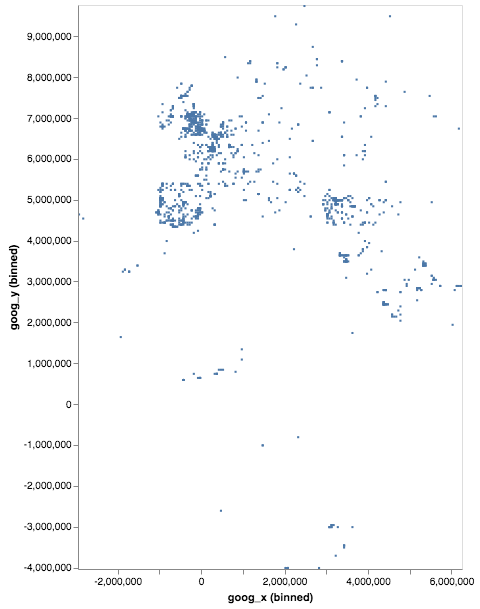

SELECT "goog_x", "goog_y"
FROM tweets_nov_feb
WHERE ("goog_x" >= -3650484.1235206556) AND
      ("goog_x" <= 7413325.514451755) AND
      ("goog_y" >= -5778161.9183506705) AND
      ("goog_y" <= 10471808.487466192)

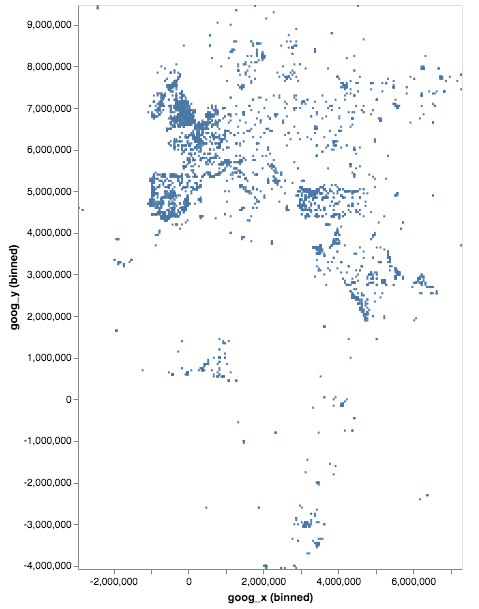

In [9]:
jupyterlab_omnisci.display_chart(alt.Chart(
    t[t.goog_x, t.goog_y],
    width=384,
    height=564
).mark_rect().encode(
    alt.X('goog_x:Q', bin=alt.Bin(maxbins=384, nice=False)),
    alt.Y('goog_y:Q', bin=alt.Bin(maxbins=564, nice=False)),
).transform_filter(
    alt.FieldRangePredicate(field='goog_x', range=[-3650484.1235206556, 7413325.514451755])
).transform_filter(
    alt.FieldRangePredicate(field='goog_y', range=[-5778161.9183506705, 10471808.487466192])
))

Now let's see if we can create an Ibis query to manually do the binning:

In [10]:
x_n = 384
y_n = 564

In [11]:
t = conn.table('tweets_nov_feb')

x_min = -3650484.1235206556
x_max = 7413325.514451755
y_min =  -5778161.9183506705
y_max = 10471808.487466192
t = t.filter([
    t.goog_x >= x_min,
    t.goog_x <= x_max,
    t.goog_y >= y_min,
    t.goog_y <= y_max
])

x_width = (x_max - x_min) / x_n
y_width = (y_max - y_min) / y_n

In [13]:

x_bucket = ((t.goog_x - int(x_min)) / int(x_width)).cast('int32').name('x_bucket')
y_bucket = ((t.goog_y - int(y_min)) / int(y_width)).cast('int32').name('y_bucket')


grouped = t.group_by([x_bucket, y_bucket]).aggregate(t.lang.arbitrary().name('lang'))
print(grouped.compile())

SELECT CAST(("goog_x" - -3650484) / 28812 AS INTEGER) AS x_bucket,
       CAST(("goog_y" - -5778161) / 28812 AS INTEGER) AS y_bucket,
       SAMPLE("lang") AS lang
FROM tweets_nov_feb
WHERE ("goog_x" >= -3650484.1235206556) AND
      ("goog_x" <= 7413325.514451755) AND
      ("goog_y" >= -5778161.9183506705) AND
      ("goog_y" <= 10471808.487466192)
GROUP BY x_bucket, y_bucket


In [14]:
df = grouped.execute()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9205 entries, 0 to 9204
Data columns (total 3 columns):
x_bucket    9205 non-null int32
y_bucket    9205 non-null int32
lang        9205 non-null object
dtypes: int32(2), object(1)
memory usage: 143.9+ KB


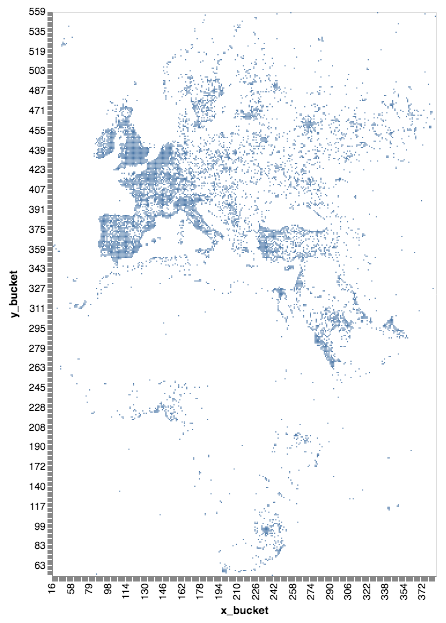

In [16]:
alt.data_transformers.enable('json')
alt.renderers.enable('default')

alt.Chart(df, width=384, height=564).mark_rect().encode(
    alt.Y('y_bucket:O', sort='descending'),
    x='x_bucket:O',   
)

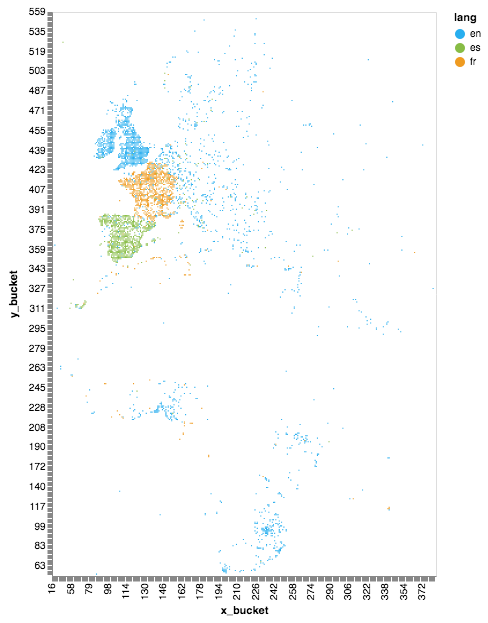

In [45]:
alt.data_transformers.enable('json')
alt.renderers.enable('default')

alt.Chart(df, width=384, height=564).mark_rect().encode(
    alt.Y('y_bucket:O', sort='descending'),
    x='x_bucket:O',
    color=alt.Color(
        'lang',
        scale=alt.Scale(
            domain=["en",  "es", "fr"],
            range=["#27aeef", "#87bc45", "#ef9b20"],
        ),
    )    
)

## "Getting More from Your Data"

SELECT "goog_x", "goog_y", "lang"
FROM tweets_nov_feb

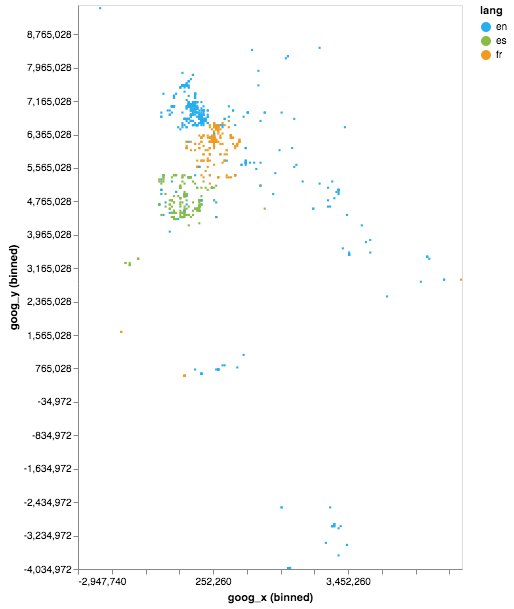

SELECT "goog_x", "goog_y", "lang"
FROM tweets_nov_feb
WHERE ("goog_x" >= -3650484.1235206556) AND
      ("goog_x" <= 7413325.514451755) AND
      ("goog_y" >= -5778161.9183506705) AND
      ("goog_y" <= 10471808.487466192)

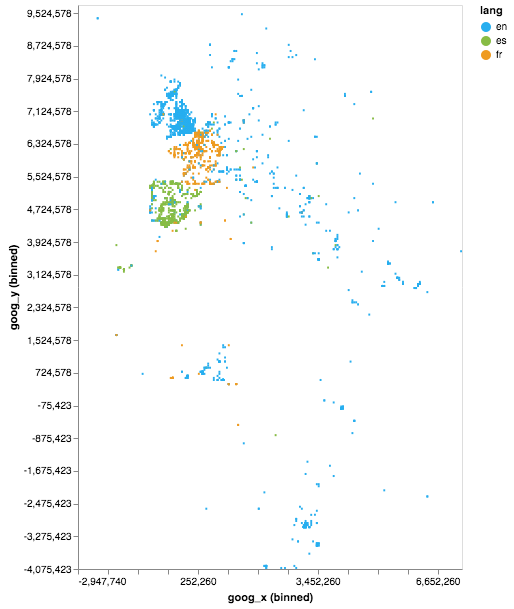

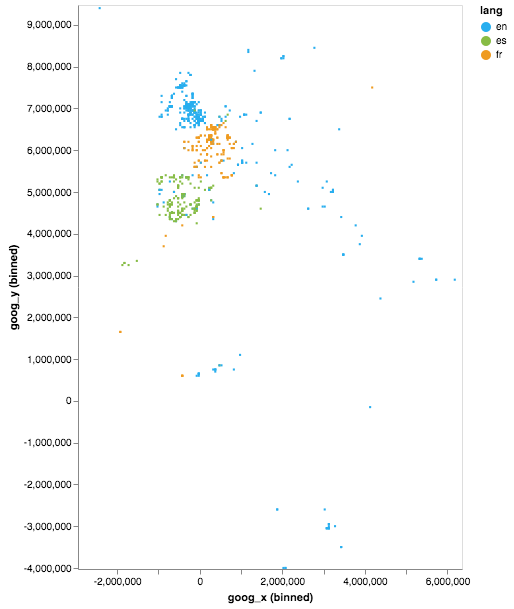

SELECT "goog_x", "goog_y", "lang"
FROM tweets_nov_feb
WHERE ("goog_x" >= -3650484.1235206556) AND
      ("goog_x" <= 7413325.514451755) AND
      ("goog_y" >= -5778161.9183506705) AND
      ("goog_y" <= 10471808.487466192)

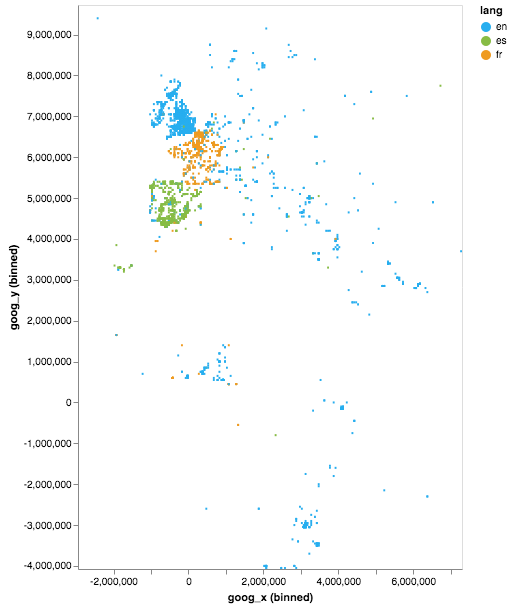

In [50]:
# can't set all to grey
# https://github.com/vega/vega-lite/issues/4255

jupyterlab_omnisci.display_chart(alt.Chart(
    t[t.goog_x, t.goog_y, t.lang],
    width=384,
    height=564
).mark_rect().encode(
    alt.X('goog_x:Q', bin=alt.Bin(maxbins=384, nice=False)),
    alt.Y('goog_y:Q', bin=alt.Bin(maxbins=564, nice=False)),
    color=alt.Color(
        'lang',
        scale=alt.Scale(
            domain=["en",  "es", "fr"],
            range=["#27aeef", "#87bc45", "#ef9b20"],
        ),
    )
).transform_filter(
    alt.FieldRangePredicate(field='goog_x', range=[-3650484.1235206556, 7413325.514451755])
).transform_filter(
    alt.FieldRangePredicate(field='goog_y', range=[-5778161.9183506705, 10471808.487466192])
))

### "Creating More Advanced Charts"

In [8]:
t2 = conn.table("contributions_donotmodify")

SELECT "lon", "lat", "recipient_party", "amount"
FROM contributions_donotmodify

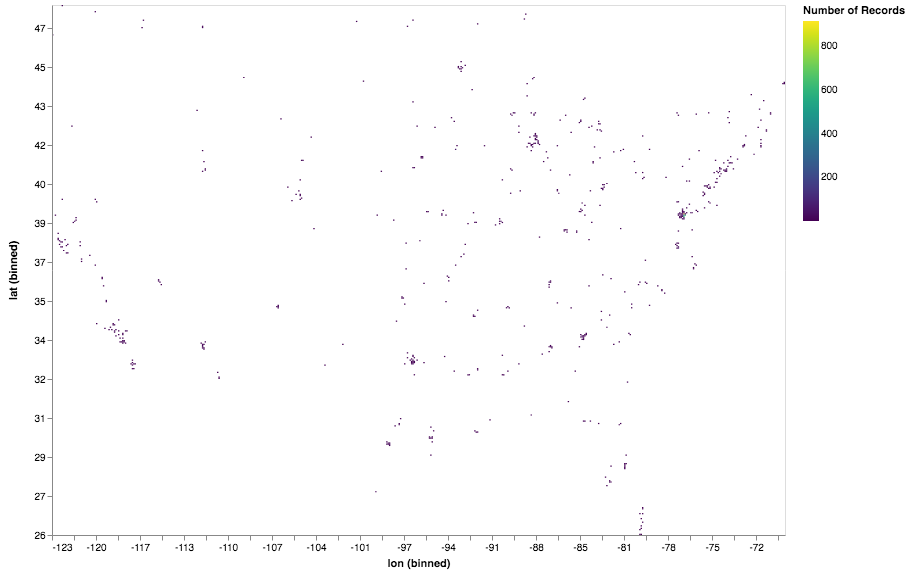

SELECT "lon", "lat", "recipient_party", "amount"
FROM contributions_donotmodify
WHERE ("lon" >= -124.39000000000038) AND
      ("lon" <= -66.93999999999943) AND
      ("lat" >= 20.61570573311549) AND
      ("lat" <= 52.93117449504004) AND
      ("recipient_party" = 'R') AND
      ("amount" > 0)

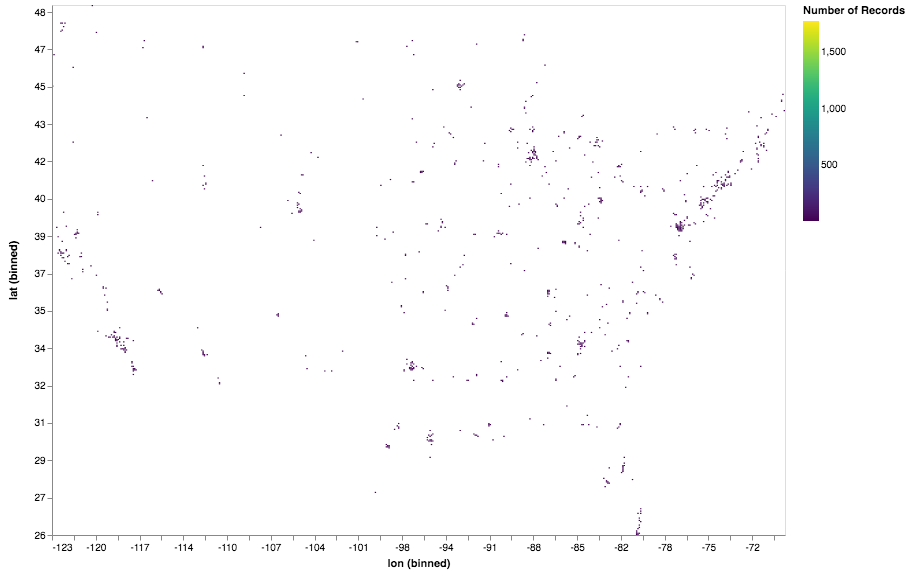

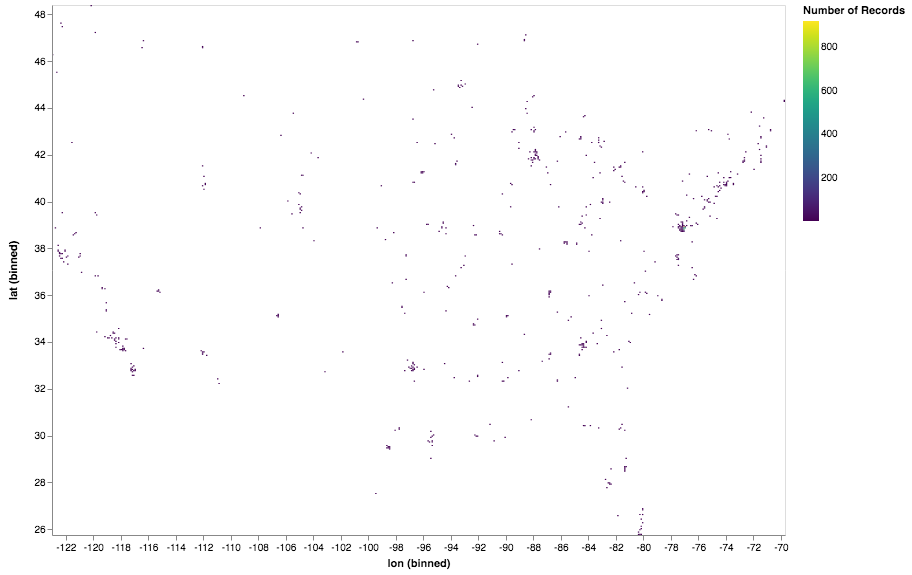

SELECT "lon", "lat", "recipient_party", "amount"
FROM contributions_donotmodify
WHERE ("lon" >= -124.39000000000038) AND
      ("lon" <= -66.93999999999943) AND
      ("lat" >= 20.61570573311549) AND
      ("lat" <= 52.93117449504004) AND
      ("recipient_party" = 'R') AND
      ("amount" > 0)

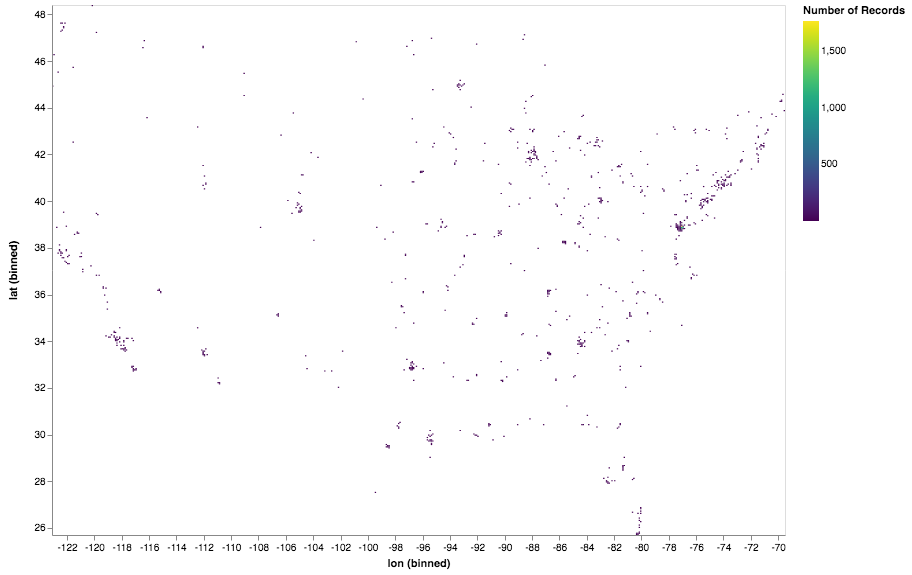

In [9]:
c = alt.Chart(
    t2[t2.lon, t2.lat, t2.recipient_party, t2.amount],
    width=733,
    height=530
).mark_rect().encode(
    alt.X('lon:Q', bin=alt.Bin(maxbins=733)),
    alt.Y('lat:Q', bin=alt.Bin(maxbins=530)),
    alt.Color('count(lon):Q')
).transform_filter(
    alt.FieldRangePredicate(field='lon', range=[-124.39000000000038, -66.93999999999943])
).transform_filter(
    alt.FieldRangePredicate(field='lat', range=[20.61570573311549, 52.93117449504004])
).transform_filter(
    alt.FieldEqualPredicate('R', 'recipient_party'),
).transform_filter(
    alt.FieldGTPredicate('amount', 0)
)
jupyterlab_omnisci.display_chart(c)

### "Working with Polys Marks Type"

TODO: Not sure how to query poly data with ibis

## Vega Accumulator
TODO: Add https://www.omnisci.com/docs/latest/6_vegaAccumulatorExample.html examples